# Data Analysis of Instacart Customer Patterns

# Project Description
In this project, we will be analyzing datasets from Instacart, a grocery delivery platform. The data consists of five separate CSV files: 'instacart_orders.csv', 'products.csv', 'order_products.csv', 'aisles.csv', and 'departments.csv'. This particular dataset was [publicly released](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) by Instacart in 2017 for a [Kaggle competition](https://www.kaggle.com/c/instacart-market-basket-analysis/overview). After cleaning up the data, we can prepare a report that gives insight into the shopping habits of Instacart customers.

## Load Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

## Load and Preprocess Data

In [ ]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep= ";") #remove ;

In [ ]:
orders.info()
display(orders)

In [2]:
orders['order_hour'] = pd.to_datetime(orders['order_hour_of_day'], format='%H').dt.time
orders['order_hour'] = pd.to_datetime(orders['order_hour'], format='%H:%M:%S')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                478967 non-null  int64         
 1   user_id                 478967 non-null  int64         
 2   order_number            478967 non-null  int64         
 3   order_dow               478967 non-null  int64         
 4   order_hour_of_day       478967 non-null  int64         
 5   days_since_prior_order  450148 non-null  float64       
 6   order_hour              478967 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 25.6 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_hour
0,1515936,183418,11,6,13,30.0,1900-01-01 13:00:00
1,1690866,163593,5,5,12,9.0,1900-01-01 12:00:00
2,1454967,39980,4,5,19,2.0,1900-01-01 19:00:00
3,1768857,82516,56,0,20,10.0,1900-01-01 20:00:00
4,3007858,196724,2,4,12,17.0,1900-01-01 12:00:00
...,...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0,1900-01-01 14:00:00
478963,3270802,112087,2,3,13,6.0,1900-01-01 13:00:00
478964,885349,82944,16,2,11,6.0,1900-01-01 11:00:00
478965,216274,4391,3,3,8,8.0,1900-01-01 08:00:00


In [3]:
products = pd.read_csv('/datasets/products.csv', sep= ";")
products.info()
display(products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [4]:
aisles = pd.read_csv('/datasets/aisles.csv', sep= ";")
aisles.info()
display(aisles)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [5]:
departments= pd.read_csv('/datasets/departments.csv', sep= ";")
departments.info()
display(departments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
order_products = pd.read_csv('/datasets/order_products.csv', sep= ";")
order_products.info(show_counts=True)
display(order_products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


## Find and remove duplicate values

In [7]:
# Check for duplicated orders
print("Number of duplicates:", orders.duplicated().sum())

Number of duplicates: 15


In [8]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_2am = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
display(wednesday_2am)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_hour
4838,2766110,162084,41,3,2,16.0,1900-01-01 02:00:00
5156,2190225,138285,18,3,2,11.0,1900-01-01 02:00:00
15506,553049,58599,13,3,2,7.0,1900-01-01 02:00:00
18420,382357,120200,19,3,2,11.0,1900-01-01 02:00:00
24691,690242,77357,2,3,2,9.0,1900-01-01 02:00:00
...,...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0,1900-01-01 02:00:00
458816,910166,164782,18,3,2,4.0,1900-01-01 02:00:00
459635,1680532,106435,6,3,2,21.0,1900-01-01 02:00:00
468324,222962,54979,59,3,2,3.0,1900-01-01 02:00:00


In [9]:
# Remove duplicate orders
orders.drop_duplicates(subset=['order_id'])

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_hour
0,1515936,183418,11,6,13,30.0,1900-01-01 13:00:00
1,1690866,163593,5,5,12,9.0,1900-01-01 12:00:00
2,1454967,39980,4,5,19,2.0,1900-01-01 19:00:00
3,1768857,82516,56,0,20,10.0,1900-01-01 20:00:00
4,3007858,196724,2,4,12,17.0,1900-01-01 12:00:00
...,...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0,1900-01-01 14:00:00
478963,3270802,112087,2,3,13,6.0,1900-01-01 13:00:00
478964,885349,82944,16,2,11,6.0,1900-01-01 11:00:00
478965,216274,4391,3,3,8,8.0,1900-01-01 08:00:00


In [10]:
# Double check for duplicate rows after removing duplicates
print("Number of duplicates after:", orders.duplicated().sum())

Number of duplicates after: 15


In [11]:
# Drop duplicates with subset order_id
orders = orders.drop_duplicates(subset=['order_id'])
# Check for duplicate order IDs again
print("Number of duplicate order IDs after:", orders.duplicated(subset=['order_id']).sum())

Number of duplicate order IDs after: 0


### `products` data frame

In [12]:
# Check for fully duplicate rows
duplicates = products.duplicated()
print("Number of product rows duplicated:", duplicates.sum())

Number of product rows duplicated: 0


In [13]:
# Check for just duplicate product IDs
duplicates = products.duplicated(subset='product_id')
print(duplicates)
print("Number of duplicates:", duplicates.sum()) 

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Length: 49694, dtype: bool
Number of duplicates: 0


No duplicates are found but better to take a look at the IDs with case difference.

In [14]:
products['product_name'] = products['product_name'].str.lower() # Convert values to lowercase
duplicates_products = products.duplicated(subset='product_name') # Check for duplicate values in the subset
print(duplicates_products)
print("Number of duplicates:", duplicates_products) 

0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Length: 49694, dtype: bool
Number of duplicates: 0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Length: 49694, dtype: bool


Check for only duplicate product names by converting names to lowercase.
Duplicates were found using the subset product_name after converting to lowercase, and was most likely a data entry errors.

In [15]:
# Check for duplicate product names that aren't missing
# Sum of duplicates 
# Print unique product names

duplicates = products.duplicated(subset='product_name')
num_duplicates = duplicates.sum()
duplicate_names = products[duplicates]['product_name'].unique()
print("Number of duplicate product names:", num_duplicates)
print("Duplicate product names:", duplicate_names)

Number of duplicate product names: 1361
Duplicate product names: [nan 'biotin 1000 mcg' 'green tea with ginseng and honey'
 'cream of mushroom soup' 'cinnamon rolls with icing'
 'american cheese slices' 'cauliflower head' 'pumpkin spice'
 'hearts of palm' 'cream of tartar' 'lasagna with meat sauce'
 'vitamin d3 2000 iu' 'dulce de leche caramel ice cream'
 'balsamic vinegar of modena' 'diced peeled tomatoes in tomato juice'
 'fresh scent dishwasher detergent with dawn' 'half and half'
 'aged balsamic vinegar of modena' 'matzo ball mix'
 'chipotle peppers in adobo sauce' 'beef ravioli in tomato & meat sauce'
 'coconut juice with pulp' 'solid white albacore tuna in water'
 'tomato and basil pasta sauce' 'albacore solid white tuna in water'
 'premium lubricant condoms enz' 'ultragel personal lubricant'
 'rigatoni with chicken & pesto' 'nutrition protein mix blueberry nut'
 'candy bar' 'beef chili with beans'
 "potatoes o'brien with onions and peppers" 'muenster cheese slices'
 'chopped gar

Removed duplicates as repeat values are unnessary and will skew data. Here is printed to see the duplicate product names which are not missing.

### `departments` data frame

In [16]:
print("Number of duplicates:", departments.duplicated().sum())

Number of duplicates: 0


We found zero duplicates in the departments data frame.

### `aisles` data frame

In [17]:
print("Number of duplicates:", aisles.duplicated().sum())

Number of duplicates: 0


We found zero duplicates in the aisles data frame.

### `order_products` data frame

In [18]:
# Check for fullly duplicate rows
order_products.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 1361


In [19]:
# Double check for any other tricky duplicates
duplicates = order_products.duplicated(subset=['order_id', 'product_id'])
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


Check for duplicated rows in order_products. To double check for any tricky duplicates make subsets for order_id and product_id, finding zero duplicates.

### `products` data frame

In [20]:
print(products.isna().sum())
print(products.head(50)) #Look at long list of printed values


product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64
    product_id                                       product_name  aisle_id  \
0            1                         chocolate sandwich cookies        61   
1            2                                   all-seasons salt       104   
2            3               robust golden unsweetened oolong tea        94   
3            4  smart ones classic favorites mini rigatoni wit...        38   
4            5                          green chile anytime sauce         5   
5            6                                       dry nose oil        11   
6            7                     pure coconut water with orange        98   
7            8                  cut russet potatoes steam n' mash       116   
8            9                  light strawberry blueberry yogurt       120   
9           10     sparkling orange juice & prickly pear beverage       115   
10          11                

In [61]:
# Are all of the missing product names associated with aisle ID 100?
products = pd.merge(products, aisles, on='aisle_id')
products = pd.merge(products, departments, on='department_id')

missing_names = products.loc[products['product_name'].isna()]
missing_names_aisle_100 = missing_names[missing_names['aisle_id'] == 100]
print(missing_names_aisle_100)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id, aisle_x, department_x, aisle_y, department_y]
Index: []


In [62]:
# Are all of the missing product names associated with department ID 21?
missing_names = products.loc[products['product_name'].isna()]
missing_names_dept_21 = missing_names[missing_names['department_id'] == 21]
print(missing_names_dept_21)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id, aisle_x, department_x, aisle_y, department_y]
Index: []


In [23]:
# What is this aisle and department?
aisle_100 = aisles[aisles['aisle_id'] == 100]['aisle'].values[0]
department_21 = departments[departments['department_id'] == 21]['department'].values[0]
print("Aisle 100 is", aisle_100)
print("Department 21 is", department_21)


Aisle 100 is missing
Department 21 is missing


Aisle 100 and Department 21 are missing by merging the products by aisle_id and department_id columns.

In [24]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')


Filled missing values, NaN, in 'product_name' column, with the string, 'Unknown'

### `orders` data frame

In [25]:
nan_values = orders.isna().sum()
print(nan_values)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
order_hour                    0
dtype: int64


In [26]:
# Are there any missing values where it's not a customer's first order?
# Sort the orders DataFrame by customer ID and order date
orders_sorted = orders.sort_values(['user_id', 'order_dow'])
first_order = orders_sorted.duplicated(subset=['user_id'])
missing_values = orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)]
print(missing_values)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order, order_hour]
Index: []


### `order_products` data frame

In [28]:
display(order_products)
missing_order_values = order_products[(order_products['add_to_cart_order'].isna())]
display(missing_order_values)
order_products.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [29]:
# What are the min and max values in this column?
print("Minimun add to cart order value:", order_products['add_to_cart_order'].min())
print("Maximum add to cart order value:", order_products['add_to_cart_order'].max())


Minimun add to cart order value: 1.0
Maximum add to cart order value: 64.0


It appears there are missing values in the add_to_cart_order column. Missing values likely mean a user may have created an account but did not add any items to cart. By taking the min and max in that column, the range is from 1 to 64.  

In [30]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
orders_missing = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique() #Check orders with a missing value and then get a list of unique values 
print(len(orders_missing)) #Print length of missing values


70


In [31]:
# Do all orders with missing values have more than 64 products?

missing_orders = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique() #Find unique vlaues of missing orders
result = all(order_products[order_products['order_id'].isin(missing_orders)].groupby('order_id').size() > 64) 
print(result)


True


In [32]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int) 

There are 70 orders with at least one missing value in the 'add_to_cart_order' column of the order_products Dataframe and that all of the orders with missing values in 'add_to_cart_order' have more than 64 products. This may be a technical issue from the data collected.


### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [33]:
print(orders['order_hour_of_day'].min(), orders['order_hour_of_day'].max()) #Print max and min of orders for order of day

orders['order_hour_of_day'].describe() #Describe order of day to see max and min

0 23


count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

In [34]:
print(orders['order_dow'].min(), orders['order_dow'].max()) #Print max and min for order dow
orders['order_dow'].describe() #Describe order dow to see max and min

0 6


count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64

To verify that the days and hours are (0-6) and (0-23), run describe() on both to check the statistics and find that the min and max are the correct values. Here also is printed the min and max. Its shown that for days, 0 is Sunday and 6 is Saturday. For hours, 0-23 represent a 24 hour clock, where 0 is 12AM, since counting starts at 0.

### [A2] What time of day do people shop for groceries?

Most frequent time people shop for groceries at: 10


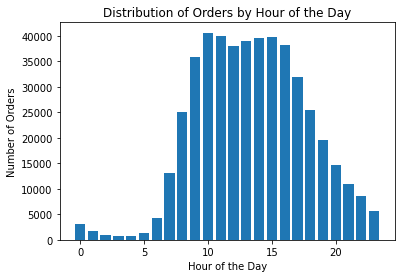

In [35]:
#Use mode instead of mean or median to get the highest values
print("Most frequent time people shop for groceries at:", orders['order_hour_of_day'].mode()[0])
hour_counts = orders['order_hour_of_day'].value_counts().sort_index()

# Create a bar chart of order counts by hour of the day
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour of the Day')

plt.show()

By finding the mode, the most frequent time of day people shop for groceries is 10, which is 10AM. A bar chart shows the overall orders by hour of day, and the distribution with the highest number of orders as the busiest time between 9-17, 9AM-5PM.

### [A3] What day of the week do people shop for groceries?

In [36]:
print("Most frequent day people shop for groceries:",orders['order_dow'].mode()[0]) # days of week is 0-6, where 0 is Sunday and 6 is Saturday

Most frequent day people shop for groceries: 0


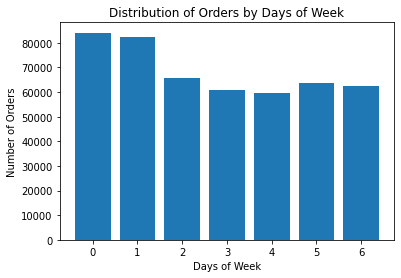

In [37]:
dow_counts = orders['order_dow'].value_counts().sort_index()
plt.bar(dow_counts.index, dow_counts.values)
plt.xlabel('Days of Week')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Days of Week')
plt.show()

By finding the mode, the most frequent day of people shop for groceries is 0, which is a Sunday. A bar chart shows the overall orders by day of week, and the distribution with the highest number of orders as the busiest days, with Monday coming as a close second busiest. Less people order groceries on Wednesday and Thursday.

### [A4] How long do people wait until placing another order?

In [38]:
median_order_wait_time = orders['days_since_prior_order'].median() #Median days people wait based omn days since prior order
mean_order_wait_time = orders['days_since_prior_order'].mean() #Mean days people wait based omn days since prior order


Median days people wait until placing another order:  7
Median days people wait until placing another order:  11
Range of days people take from prior order: 30.0


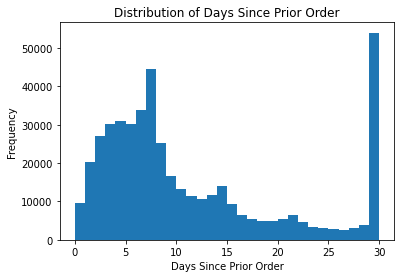

In [39]:
print("Median days people wait until placing another order: ", median_order_wait_time.astype(int))
print("Median days people wait until placing another order: ", mean_order_wait_time.astype(int))

min_days = orders['days_since_prior_order'].min()
max_days = orders['days_since_prior_order'].max()
range= max_days-min_days
print("Range of days people take from prior order:", range) 
plt.hist(orders['days_since_prior_order'], bins=30)
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.title('Distribution of Days Since Prior Order')
plt.show()

Take the median to get rid of outliers in the dataset, to find how many days people wait until placing their next order, which is 7. By finding the average, or mean, of the days waited, it's noticed it was 11 days waited. A histogram of the overall data shows the range of days waited, from the minimum days to the maximum days, which was 30, and also the most frequent. Most people wait an average number of days, but others are less likely to use the service because they may go in person or have other preferences. 

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [40]:
wed_orders = orders[orders['order_dow'] == 3]

In [41]:
sat_orders = orders[orders['order_dow'] == 6]


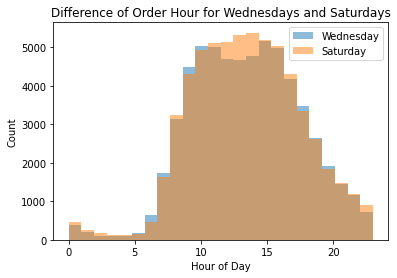

In [42]:
plt.hist(wed_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Wednesday') # use 24 bins for 24 hours in a day and alpha for transparency
plt.hist(sat_orders['order_hour_of_day'], bins=24, alpha=0.5, label='Saturday')
plt.title('Difference of Order Hour for Wednesdays and Saturdays')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend()
plt.show()

Reserarch shows that Wednesdays the orders peak around 10AM, while on Saturdays it peaks around 3PM, and the overall range of values is wider on Saturdays for earlier and later hours of the day.

### [B2] What's the distribution for the number of orders per customer?

In [43]:
orders_per_user = orders.groupby('user_id')['order_id'].count()

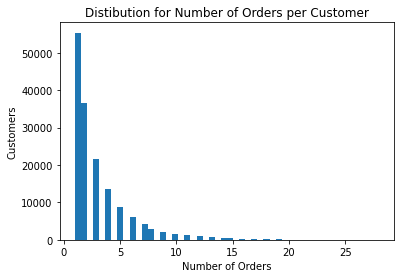

In [44]:
orders_per_user = orders.groupby('user_id')['order_id'].count()
plt.hist(orders_per_user, bins=50)
plt.title('Distibution for Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Customers')

plt.show()

This chart shows us that the number of orders seems to decline after the first few orders. It peaks at about 1-2 orders and steadily declines. This could be that people are willing to try the platform but dont continue using it barely more than 10 times. 

### [B3] What are the top 20 popular products (display their id and name)?

In [45]:
product_counts = order_products.groupby('product_id')['order_id'].count() 

In [46]:
product_counts = pd.merge(product_counts, products[['product_id', 'product_name']], on='product_id') #Merge 

In [47]:
popular_products = product_counts.sort_values('order_id', ascending=False).head(20)  
print(popular_products[['product_id', 'product_name']]) #Popular products with product_id and product_name showing

       product_id              product_name
22808       24852                    banana
12025       13176    bag of organic bananas
19370       21137      organic strawberries
20077       21903      organic baby spinach
43271       47209      organic hass avocado
43788       47766           organic avocado
43663       47626               large lemon
15364       16797              strawberries
24047       26209                     limes
25556       27845        organic whole milk
25666       27966       organic raspberries
21025       22935      organic yellow onion
22908       24964            organic garlic
41244       45007          organic zucchini
35996       39275       organic blueberries
45561       49683            cucumber kirby
25889       28204        organic fuji apple
5375         5876             organic lemon
7543         8277  apple honeycrisp organic
37301       40706    organic grape tomatoes


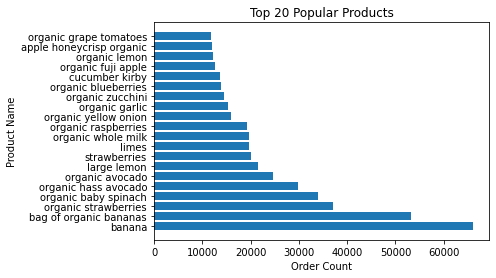

In [48]:
plt.barh(popular_products['product_name'], popular_products['order_id'])
plt.xlabel('Order Count')
plt.ylabel('Product Name')
plt.title('Top 20 Popular Products')
plt.show()

To find the top 20 popular products, group the order products by product_id and order_id, then counting the number of orders per product. Then that series, group them with their corresponding product name and sort in ascending order, while selecting the top 20 rows. A horizontal bar chart is shown to make this more visible. From this graph, it is shown that the product, banana, is by far the most popular. Also noticeable is people tend to favor fruits and vegetables as these are the primary products in the top listed.

### [C1] How many items do people typically buy in one order? What does the distribution look like?

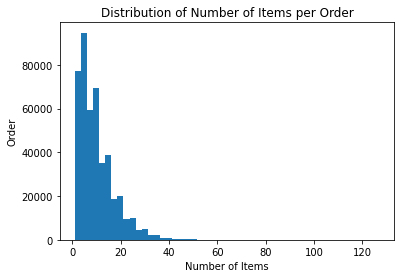

In [49]:
items_per_order = order_products.groupby('order_id')['product_id'].count()
plt.hist(items_per_order, bins=50)
plt.xlabel('Number of Items')
plt.ylabel('Order')
plt.title('Distribution of Number of Items per Order')
plt.show()

In [50]:
mean_items_per_order = items_per_order.mean() #Find the mean of the items_per_order and save variable
median_items_per_order = items_per_order.median() #Find the median of the items_per_order and save variable

In [51]:
print("Mean number of items per order: ", mean_items_per_order) #print both results
print("Median number of items per order: ", median_items_per_order)

Mean number of items per order:  10.098983215049127
Median number of items per order:  8.0


The chart above shows that the number of items by the order, and the distribution is most significant between 2-20 items, seeming that people rarely have no more than 10 orders. Calculate the mean and median as 10.1 and 8. The amount of items could be based off of daily or weekly grocery shopping habits and meal planning.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [52]:
reordered_products = order_products[order_products['reordered'] == 1]

In [53]:
reordered_products = reordered_products.merge(products, on='product_id', how='left')

In [54]:
#Get the products names and ids
reordered_products_counts = reordered_products.groupby(['product_id', 'product_name'])['reordered'].count().reset_index(name='reorder_count')
reordered_products_counts_sorted = reordered_products_counts.sort_values('reorder_count', ascending=False)

In [55]:
top_20_reordered_products = reordered_products_counts_sorted.head(20)

print(top_20_reordered_products[['product_id', 'product_name', 'reorder_count']])

       product_id              product_name  reorder_count
18104       24852                    banana          55763
9528        13176    bag of organic bananas          44450
15368       21137      organic strawberries          28639
15936       21903      organic baby spinach          26233
34407       47209      organic hass avocado          23629
34828       47766           organic avocado          18743
20285       27845        organic whole milk          16251
34725       47626               large lemon          15044
20375       27966       organic raspberries          14748
12193       16797              strawberries          13945
19088       26209                     limes          13327
16700       22935      organic yellow onion          11145
18186       24964            organic garlic          10411
32792       45007          organic zucchini          10076
36219       49683            cucumber kirby           9538
20543       28204        organic fuji apple           89

To find the top 20 producted that are reordered and diplay their names and IDs. Take notice of products that were reordered more than once, merge the products with their product_ids, group the product_id and product_name, then count and sort. After displaying a list of the of the top 20 reordered, it showns that the list is similar to the top 20 products shown above, but has some difference and additional items. 

### [C3] For each product, what proportion of its orders are reorders?

In [56]:
# Merge order_products with products on product_id
merged = pd.merge(order_products, products, on='product_id')

In [57]:
reorder_prop = merged.groupby(['product_id', 'product_name'])['reordered'].mean().reset_index()


In [58]:
display(reorder_prop[['product_id', 'product_name', 'reordered']])


,product_id,product_name,reordered
0,1,chocolate sandwich cookies,0.564286
1,2,all-seasons salt,0.000000
2,3,robust golden unsweetened oolong tea,0.738095
3,4,smart ones classic favorites mini rigatoni wit...,0.510204
4,7,pure coconut water with orange,0.500000
...,...,...,...
45568,49690,high performance energy drink,0.800000
45569,49691,original pancake & waffle mix,0.430556
45570,49692,organic instant oatmeal light maple brown sugar,0.416667
45571,49693,spring water body wash,0.440000


To find the proportions of the each product, of what proportions of its orders are reordered, merge the data, group, and get the mean value. Reset the index and display the reorder proportions by product_id and product_name. This shows info of higher or lower proportions reordered of each product.

### [C4] For each customer, what proportion of their products ordered are reorders?

In [59]:
# Merge order_products and orders to get the user_id for each order
merge = pd.merge(order_products, orders, on='order_id')
# Group by user_id and get the sum of both, product id and reordered
group = merge.groupby('user_id')['reordered'].mean()
print(group)


user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


By merging the order_products and orders, then grouping the merged data by user_id and the reordered column, it gets the sum of them and return the mean value that shows the proportion by each customer of the products that are reorders.


### [C5] What are the top 20 items that people put in their carts first? 

In [60]:

# Merge products with order_products
merged = pd.merge(products, order_products, on='product_id')

# Filter merged dataframe to only keep rows where add_to_cart_order is 1
filtered = merged[merged['add_to_cart_order'] == 1]

# Group by product_id and product_name, count and sort
first_products = filtered.groupby(['product_id', 'product_name']).size().reset_index(name='count').sort_values('count', ascending=False)[:20]

# Display top 20 products with count and product_id
print(first_products[['product_name', 'count', 'product_id']])


                      product_name  count  product_id
13414                       banana  15562       24852
7127        bag of organic bananas  11026       13176
15028           organic whole milk   4363       27845
11384         organic strawberries   3946       21137
25439         organic hass avocado   3390       47209
11786         organic baby spinach   3336       21903
25732              organic avocado   3044       47766
10622                 spring water   2336       19660
9050                  strawberries   2308       16797
15102          organic raspberries   2024       27966
24024   sparkling water grapefruit   1914       44632
26519          organic half & half   1797       49235
25658                  large lemon   1737       47626
115                           soda   1733         196
20853     organic reduced fat milk   1397       38689
14158                        limes   1370       26209
6660                 hass avocados   1340       12341
3153   organic reduced fat 2

To find the top 20 items that people put in their carts first, merge the products and order_products on product_id, then create a filter on the merged dataframe where add_to_cart_order is 1. This the first products by grouping the product_id and product_name, count and sort the first 20 in descending order. Again this follows similar but different trends to other top 20 lists. 

# Overall Conclusion
The instacart data provided was used to report insight into the shopping habits of Instacart customers. After cleaning and analyzing the data we can see trends in most common days/hours people use the platform, how many orders, how frequently, and if they are likely to make further orders. 

Overall, this data analysis project has provided valuable insights into the shopping habits of Instacart customers. Key findings and observations include:

1. **Shopping Times**: The most frequent time for people to shop for groceries on Instacart is around 10 AM. People also tend to shop more on Sundays and Mondays.

2. **Order Frequency**: The distribution of the number of orders per customer shows that most customers tend to make 1-2 orders, and the number of orders decreases as the count goes up.

3. **Popular Products**: The top 20 popular products include items like bananas, strawberries, and avocados. Fruits and vegetables dominate the list.

4. **Items Per Order**: People typically buy between 2-20 items in one order, with an average of around 10 items.

5. **Reordered Products**: The top 20 most frequently reordered products overlap significantly with the top 20 popular products, indicating customer loyalty to certain items.

6. **Reorder Proportions**: Different products have varying proportions of reorders, with some products being reordered more frequently than others.

7. **Customer Reorder Proportions**: The analysis shows the proportion of products reordered by each customer, offering insights into individual shopping behaviors.

8. **First Items in Carts**: The top 20 items that people put in their carts first include a variety of products, suggesting different preferences among customers.

The analysis shows patterns and trends in Instacart customer behavior, which can be valuable for the company in terms of inventory management, marketing strategies, and improving the overall customer experience. It's clear that customer preferences vary widely, and understanding these variations can help Instacart cater to their customers more effectively.

Please note that this analysis is based on a specific dataset from 2017, and customer behavior may have evolved over time.